In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
# Load your data
data = pd.read_csv('nigeria-endsars-tweet-data-from-2017-to-2022.csv')

C:\Users\Wadud Ambali\AppData\Local\Temp\ipykernel_3956\2305722511.py:2: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('nigeria-endsars-tweet-data-from-2017-to-2022.csv')


In [3]:
data.columns

Index(['Unnamed: 0', '_type', 'url', 'date', 'content', 'renderedContent',
       'id', 'user', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags'],
      dtype='object')

In [4]:
data.head()

,Unnamed: 0,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,0,snscrape.modules.twitter.Tweet,https://twitter.com/MrKenny36126188/status/153...,2022-05-31 18:24:14+00:00,I see the likes of @BrymOlawale eniola support...,I see the likes of @BrymOlawale eniola support...,1531703111840157700,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,1,...,NaN,NaN,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['Endsars', 'PetroPresidenteEnPrimera', 'Peter...",NaN
1,1,snscrape.modules.twitter.Tweet,https://twitter.com/KachiEriobu/status/1531630...,2022-05-31 13:35:51+00:00,Soro soke a Nigerian slogan that emerged durin...,Soro soke a Nigerian slogan that emerged durin...,1531630538263519234,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['EndSARS', 'Soro', 'trademark']",NaN
2,2,snscrape.modules.twitter.Tweet,https://twitter.com/end_sars1/status/153160650...,2022-05-31 12:00:20+00:00,What do we want???? \n END SARS \n @PoliceN...,What do we want???? \n END SARS \n @PoliceN...,1531606501575516160,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,...,NaN,NaN,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['EndSarsNow', 'EndSARS']",NaN
3,3,snscrape.modules.twitter.Tweet,https://twitter.com/alase_ayorinde/status/1531...,2022-05-30 13:50:53+00:00,Honestly for him\nEvery youth need to replicat...,Honestly for him\nEvery youth need to replicat...,1531271934511566849,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,2,...,NaN,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,NaN,NaN,NaN,NaN,['EndSars'],NaN
4,4,snscrape.modules.twitter.Tweet,https://twitter.com/AburoBigWiz/status/1531197...,2022-05-30 08:55:28+00:00,Since election is approaching \nLet’s go out a...,Since election is approaching \nLet’s go out a...,1531197588686381056,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,6,...,NaN,NaN,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['EndSarsNow', 'EndSARS', 'fc']",NaN


In [5]:
data['content'].isnull().sum()

0

###The Whole Text Data Cleaning in a Function

In [7]:
# Text preprocessing function with lemmatization
def preprocess_text_lemmatization(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs starting with 'http'
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    words = word_tokenize(text)  # Tokenization
    words = [word for word in words if word.isalpha()]  # Remove non-alphabetic tokens
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(words)

# Apply preprocessing with lemmatization to the 'Text' column
data['Processed_Text'] = data['content'].apply(preprocess_text_lemmatization)

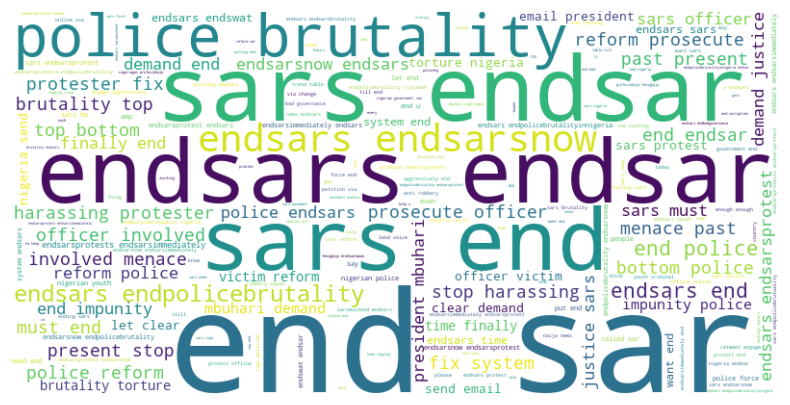

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all processed text into a single string
processed_text_combined = ' '.join(data['Processed_Text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text_combined)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the processed text data
vectorizer = CountVectorizer(max_df=0.85, max_features=1000, stop_words='english')
X = vectorizer.fit_transform(data['Processed_Text'])

# Apply LDA
num_topics = 5  # You can adjust the number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Display the top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print()

Topic #1:
endsarsnow endpolicebrutality endsarsimmediately endsarsprotests endsarsprotest criminal endsarsbrutality retweet youth till

Topic #2:
police nigeria brutality president mbuhari time reform demand justice victim

Topic #3:
nigeria protest nigerian police youth endpolicebrutality bad voice brutality endswat

Topic #4:
want people need protest endsarsnow nigerian government ha like let

Topic #5:
police reform stop brutality officer menace protester harassing prosecute involved



Topic #1:
endsarsnow endpolicebrutality endsarsimmediately endsarsprotests endsarsprotest criminal endsarsbrutality retweet youth till


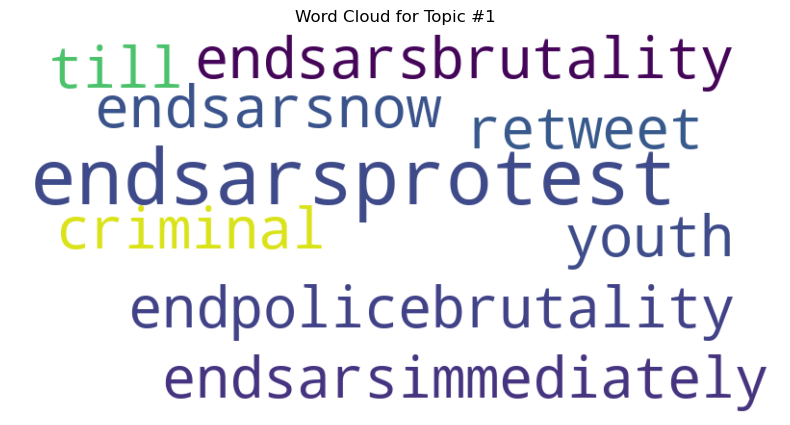

Topic #2:
police nigeria brutality president mbuhari time reform demand justice victim


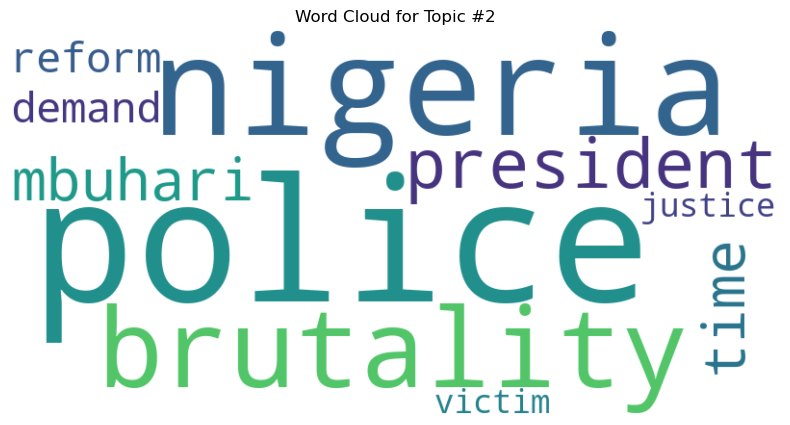

Topic #3:
nigeria protest nigerian police youth endpolicebrutality bad voice brutality endswat


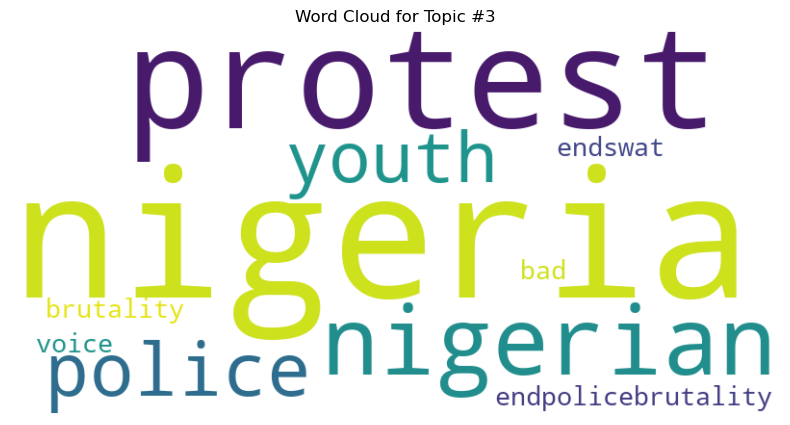

Topic #4:
want people need protest endsarsnow nigerian government ha like let


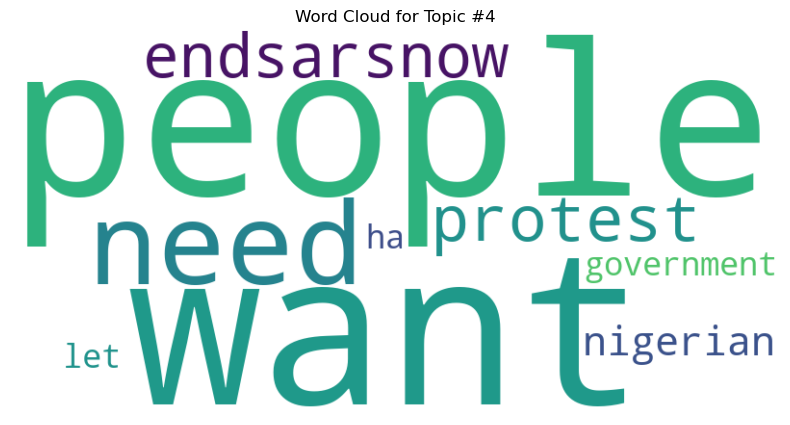

Topic #5:
police reform stop brutality officer menace protester harassing prosecute involved


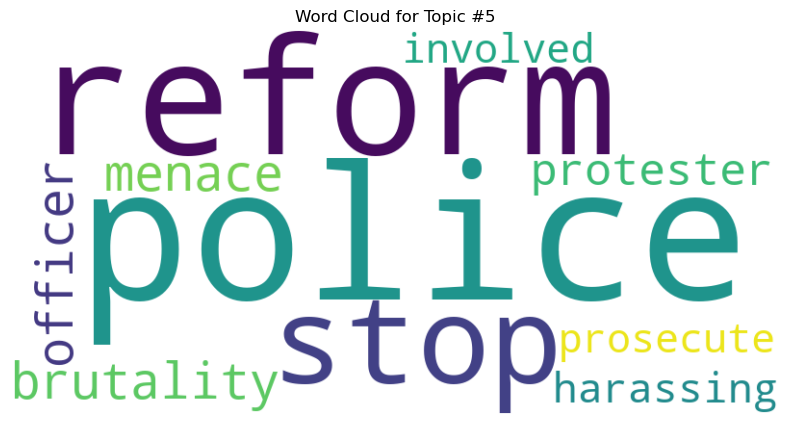


Average Topic Probabilities Across Documents:
Topic #1: 0.1790
Topic #2: 0.0958
Topic #3: 0.2224
Topic #4: 0.3790
Topic #5: 0.1238


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Vectorize the processed text data
vectorizer = CountVectorizer(max_df=0.85, max_features=1000, stop_words='english')
X = vectorizer.fit_transform(data['Processed_Text'])

# Apply LDA
num_topics = 5  # You can adjust the number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Display the top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_keywords = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
    
    # Print identified topics and associated keywords
    print(f"Topic #{topic_idx + 1}:")
    print(" ".join(top_keywords))
    
    # Visualize word cloud for each topic
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(top_keywords))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Topic #{topic_idx + 1}")
    plt.show()

# Assess the effectiveness of CountVectorizer and LDA
# Discuss strengths and limitations, compare with research objectives
average_topic_probabilities = np.mean(lda.transform(X), axis=0)
print("\nAverage Topic Probabilities Across Documents:")
for topic_idx, avg_prob in enumerate(average_topic_probabilities):
    print(f"Topic #{topic_idx + 1}: {avg_prob:.4f}")

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Vectorize the processed text data using TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Processed_Text'])

# Apply NMF
num_topics = 5  # You can adjust the number of topics
nmf = NMF(n_components=num_topics, random_state=42)
nmf.fit(tfidf_matrix)

# Display the top words for each topic
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic #{topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print()

Topic #1:
police prosecute involved harassing menace present past protester stop fix

Topic #2:
endsarsnow endpolicebrutality endsarsprotest endsarsbrutality endsarsprotests endsarsparmanentlynow endsarsnotbansars want endpolicebrutalitynow fist

Topic #3:
police email torture finally send victim justice impunity president time

Topic #4:
endsarsimmediately endsarsprotests criminal youth endsarsprotest tweet engage offline table hashtags

Topic #5:
want nigerian protest nigeria endswat people government need endpolicebrutalityinnigeria police



Topic #1:
police prosecute involved harassing menace present past protester stop fix


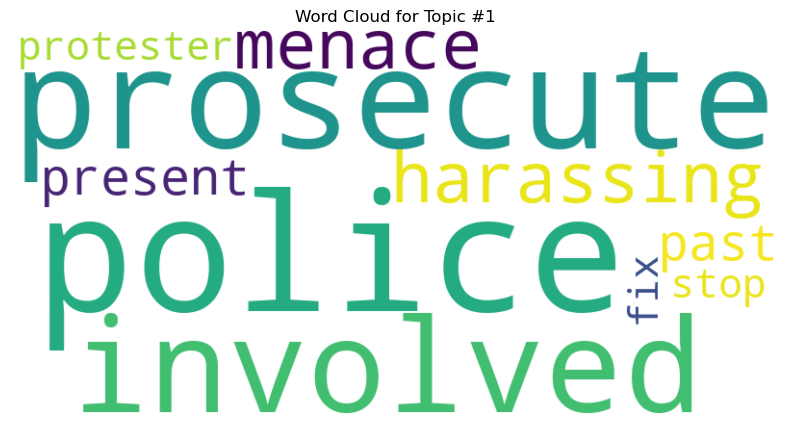

Topic #2:
endsarsnow endpolicebrutality endsarsprotest endsarsbrutality endsarsprotests endsarsparmanentlynow endsarsnotbansars want endpolicebrutalitynow fist


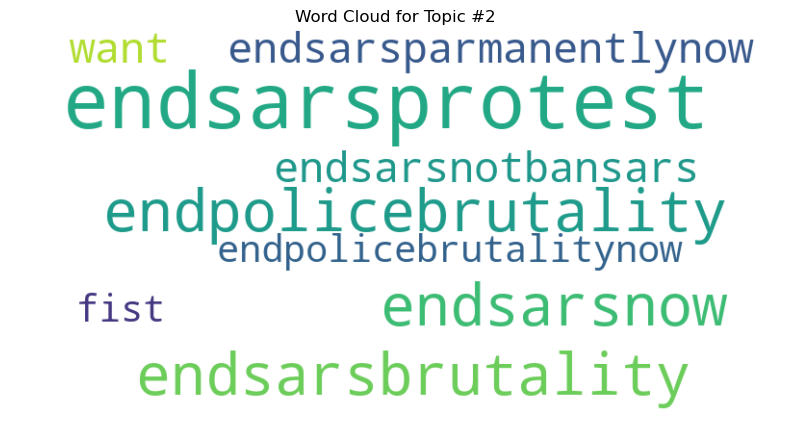

Topic #3:
police email torture finally send victim justice impunity president time


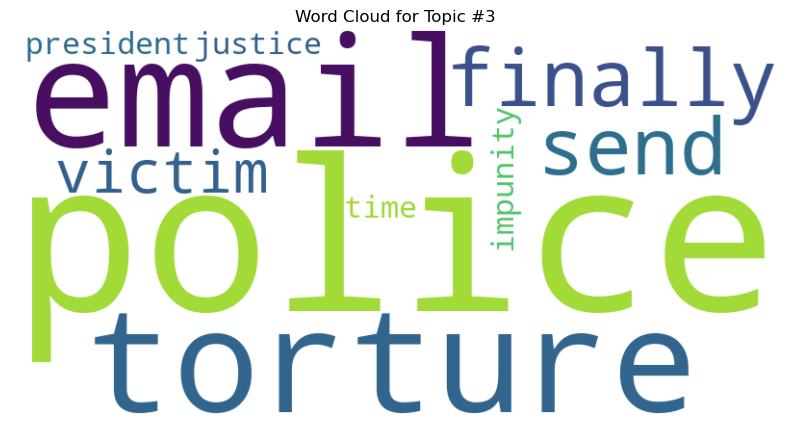

Topic #4:
endsarsimmediately endsarsprotests criminal youth endsarsprotest tweet engage offline table hashtags


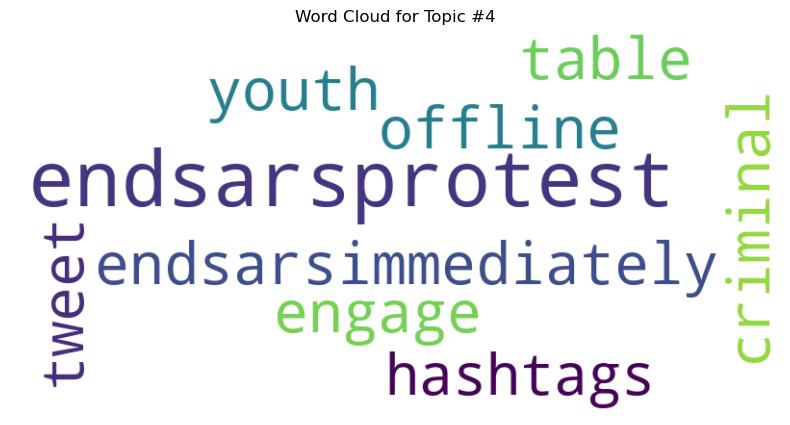

Topic #5:
want nigerian protest nigeria endswat people government need endpolicebrutalityinnigeria police


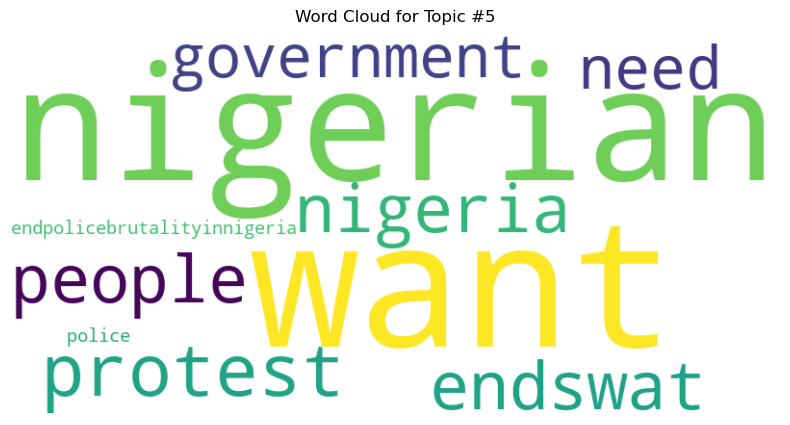


Average Topic Probabilities Using TF-IDF and NMF:
Topic #1: 0.0080
Topic #2: 0.0091
Topic #3: 0.0076
Topic #4: 0.0080
Topic #5: 0.0172


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Vectorize the processed text data using TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Processed_Text'])

# Apply NMF
num_topics = 5  # You can adjust the number of topics
nmf = NMF(n_components=num_topics, random_state=42)
nmf.fit(tfidf_matrix)

# Display the top words for each topic and visualize
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf.components_):
    top_keywords = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
    
    # Print identified topics and associated keywords
    print(f"Topic #{topic_idx + 1}:")
    print(" ".join(top_keywords))
    
    # Visualize word cloud for each topic
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(top_keywords))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Topic #{topic_idx + 1}")
    plt.show()

# Assess the effectiveness of TF-IDF Vectorizer and NMF
# Compare with CountVectorizer and LDA, highlighting any variations and insights gained
average_topic_probabilities_nmf = np.mean(nmf.transform(tfidf_matrix), axis=0)
print("\nAverage Topic Probabilities Using TF-IDF and NMF:")
for topic_idx, avg_prob in enumerate(average_topic_probabilities_nmf):
    print(f"Topic #{topic_idx + 1}: {avg_prob:.4f}")

# Add further discussion on variations and insights gained
# ...


### Plotting bar chart for topic distribution comparison

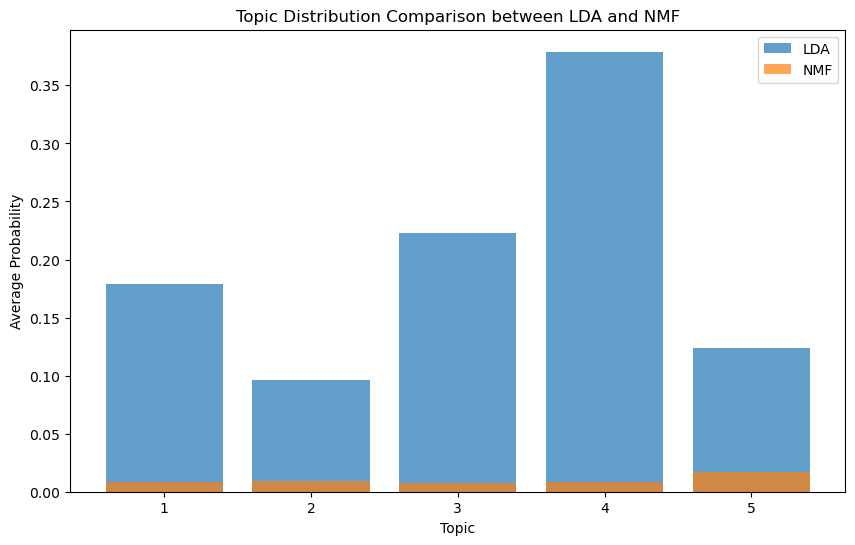

In [13]:
# Plotting bar chart for topic distribution comparison
topics = range(1, num_topics + 1)

plt.figure(figsize=(10, 6))
plt.bar(topics, average_topic_probabilities, label='LDA', alpha=0.7)
plt.bar(topics, average_topic_probabilities_nmf, label='NMF', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Average Probability')
plt.title('Topic Distribution Comparison between LDA and NMF')
plt.legend()
plt.show()

In [14]:
# Identify top documents for each topic in LDA
top_documents_lda = np.argmax(lda.transform(X), axis=0)

# Identify top documents for each topic in NMF
top_documents_nmf = np.argmax(nmf.transform(tfidf_matrix), axis=0)

# Print and analyze the identified top documents for further insights
for topic_idx in range(num_topics):
    print(f"Top Document for Topic #{topic_idx + 1} in LDA:")
    print(data['content'].iloc[top_documents_lda[topic_idx]])
    print("\n")

for topic_idx in range(num_topics):
    print(f"Top Document for Topic #{topic_idx + 1} in NMF:")
    print(data['content'].iloc[top_documents_nmf[topic_idx]])
    print("\n")

Top Document for Topic #1 in LDA:
@Kingsma88538518 @falzthebahdguy @Updateboyx @Peruzzi @wizkidayo @burnaboy @PoliceNG RETWEET AND ENGAGE AGGRESSIVELY, END SARS HAS TO KEEP TOPPING THE TREND TABLE TILL THEY END SARS 🗣

WE PROTEST OFFLINE AND ONLINE🗣

USE THE HASHTAGS!!🗣
#EndSARS 
#EndSarsProtests 
#EndSarsProtests 
#EndSARSImmediately 
#EndSARSProtest #EndSarsNow #EndSARSImmediately #EndSARS


Top Document for Topic #2 in LDA:
It's time to finally end impunity for police brutality and torture in #Nigeria. Send an email to President @MBuhari to demand justice for SARS officers' victims and the reform of police.#EndSARS https://t.co/FENzrxUY2t No Sars we are tied of police brutality in Nigeria


Top Document for Topic #3 in LDA:
#EndSars calls for an end to the Special Anti-Robbery Squad (SARS), a unit of Nigerian Police with a long record of abuse against Nigerian citizens. On October 20th 2020 Nigerian armed forces shot at peaceful protesters at the Lekki toll gate in Lagos, Nigeria, k

### PLOTTING THE AVERAGE TOPIC DISTRIBUTION

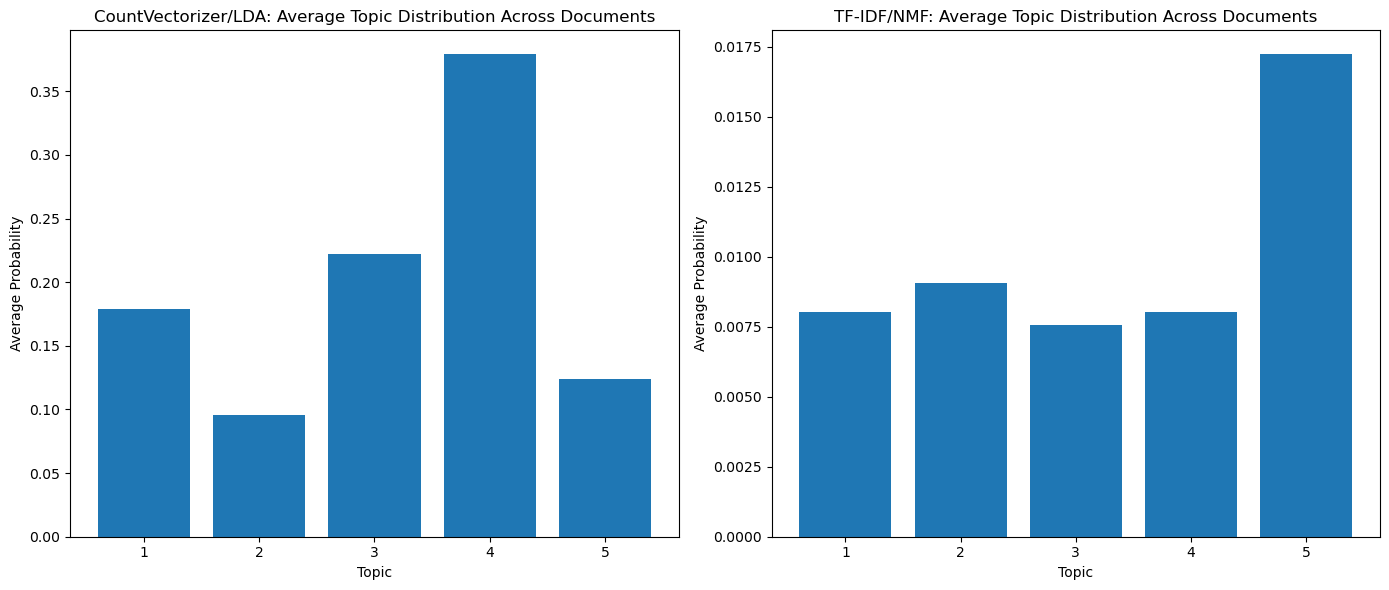


Actual Mean Values for CountVectorizer and LDA:
Topic #1: 0.1790
Topic #2: 0.0958
Topic #3: 0.2224
Topic #4: 0.3790
Topic #5: 0.1238

Actual Mean Values for TF-IDF and NMF:
Topic #1: 0.0080
Topic #2: 0.0091
Topic #3: 0.0076
Topic #4: 0.0080
Topic #5: 0.0172


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your DataFrame with 'Processed_Text' column

# For CountVectorizer and LDA
topics_lda = lda.transform(X)
average_probabilities_lda = np.mean(topics_lda, axis=0)

# For TF-IDF and NMF
topics_nmf = nmf.transform(tfidf_matrix)
average_probabilities_nmf = np.mean(topics_nmf, axis=0)

# Create a bar plot for average topic probabilities
plt.figure(figsize=(14, 6))

# Plot for CountVectorizer and LDA
plt.subplot(1, 2, 1)
plt.bar(range(1, num_topics + 1), average_probabilities_lda)
plt.xlabel('Topic')
plt.ylabel('Average Probability')
plt.title('CountVectorizer/LDA: Average Topic Distribution Across Documents')
plt.xticks(range(1, num_topics + 1))

# Plot for TF-IDF and NMF
plt.subplot(1, 2, 2)
plt.bar(range(1, num_topics + 1), average_probabilities_nmf)
plt.xlabel('Topic')
plt.ylabel('Average Probability')
plt.title('TF-IDF/NMF: Average Topic Distribution Across Documents')
plt.xticks(range(1, num_topics + 1))

plt.tight_layout()
plt.show()

# Print the actual mean values for CountVectorizer and LDA
print("\nActual Mean Values for CountVectorizer and LDA:")
for topic_idx, avg_prob in enumerate(average_probabilities_lda):
    print(f"Topic #{topic_idx + 1}: {avg_prob:.4f}")

# Print the actual mean values for TF-IDF and NMF
print("\nActual Mean Values for TF-IDF and NMF:")
for topic_idx, avg_prob in enumerate(average_probabilities_nmf):
    print(f"Topic #{topic_idx + 1}: {avg_prob:.4f}")